# LightGBM: Credit Score 예측모델 만들기

## 데이터 살펴보기

In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://github.com/DSNote/fastcampus/raw/main/credit.csv'

In [3]:
credit_df = pd.read_csv(url)
credit_df.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,...,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,...,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,...,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard


In [4]:
credit_df.iloc[2963]

ID                                                   0xa0e6
Customer_ID                                      CUS_0x663b
Name                                        Tim McLaughlinz
Age                                                    8592
SSN                                             655-70-2468
Occupation                                          _______
Annual_Income                                      81815.02
Num_Bank_Accounts                                         0
Num_Credit_Card                                           5
Interest_Rate                                             4
Num_of_Loan                                              1_
Type_of_Loan                                  Mortgage Loan
Delay_from_due_date                                       4
Num_of_Delayed_Payment                                  NaN
Num_Credit_Inquiries                                    3.0
Outstanding_Debt                                    1434.75
Credit_Utilization_Ratio                

In [5]:
credit_df = credit_df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1)
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [6]:
credit_df['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [7]:
credit_df['Credit_Score'] = credit_df['Credit_Score'].replace({'Poor':0, 'Standard':1, 'Good':2})
credit_df['Credit_Score'].head()

0    2
1    1
2    2
3    1
4    1
Name: Credit_Score, dtype: int64

In [8]:
credit_df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
count,12500.000000,12500.000000,12500.00000,12500.000000,12264.000000,12500.000000,12500.000000,12366.000000,12500.000000
mean,17.275120,21.647680,69.46520,21.051440,24.591650,32.291949,1303.781040,405.815391,0.871440
std,118.518214,123.789969,455.95698,14.859994,183.422458,5.084327,8118.261086,218.136964,0.654268
min,0.000000,1.000000,1.00000,-5.000000,0.000000,20.992914,0.000000,0.088628,0.000000
25%,3.000000,4.000000,8.00000,10.000000,2.000000,28.110034,29.128806,271.785749,0.000000
50%,6.000000,5.000000,13.00000,18.000000,4.000000,32.297912,66.372879,337.169588,1.000000
75%,7.000000,7.000000,20.00000,28.000000,8.000000,36.458660,149.904496,475.222487,1.000000
max,1779.000000,1479.000000,5788.00000,67.000000,2592.000000,49.564519,82122.000000,1602.040519,2.000000


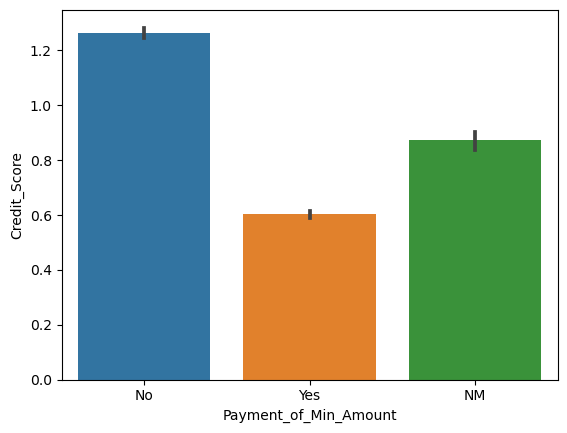

In [9]:
sns.barplot(data=credit_df, x='Payment_of_Min_Amount', y='Credit_Score')
plt.show()

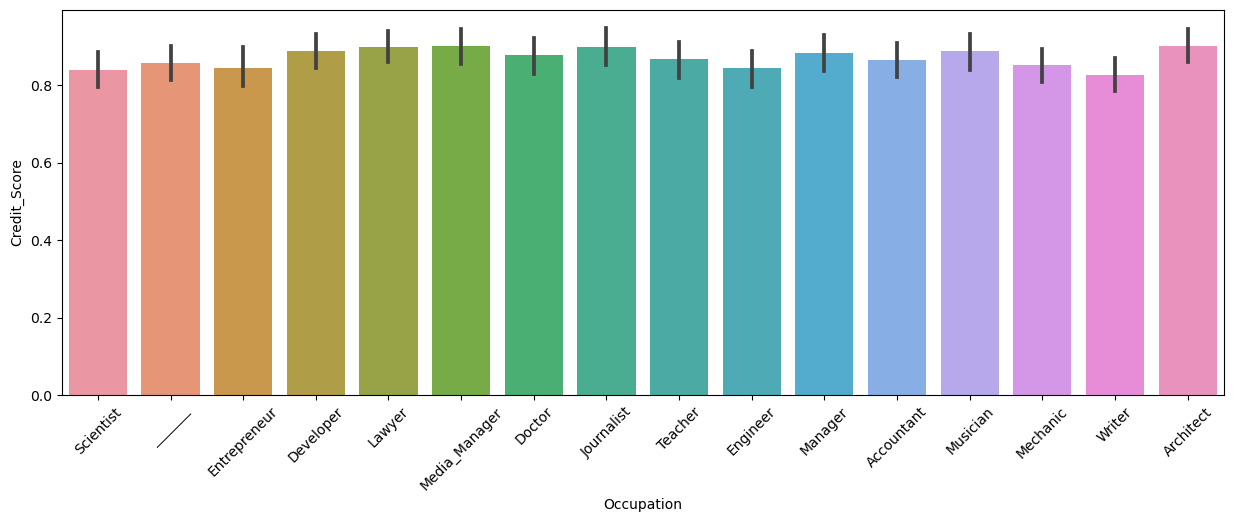

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(data=credit_df, x='Occupation', y='Credit_Score')
plt.xticks(rotation=45)
plt.show()

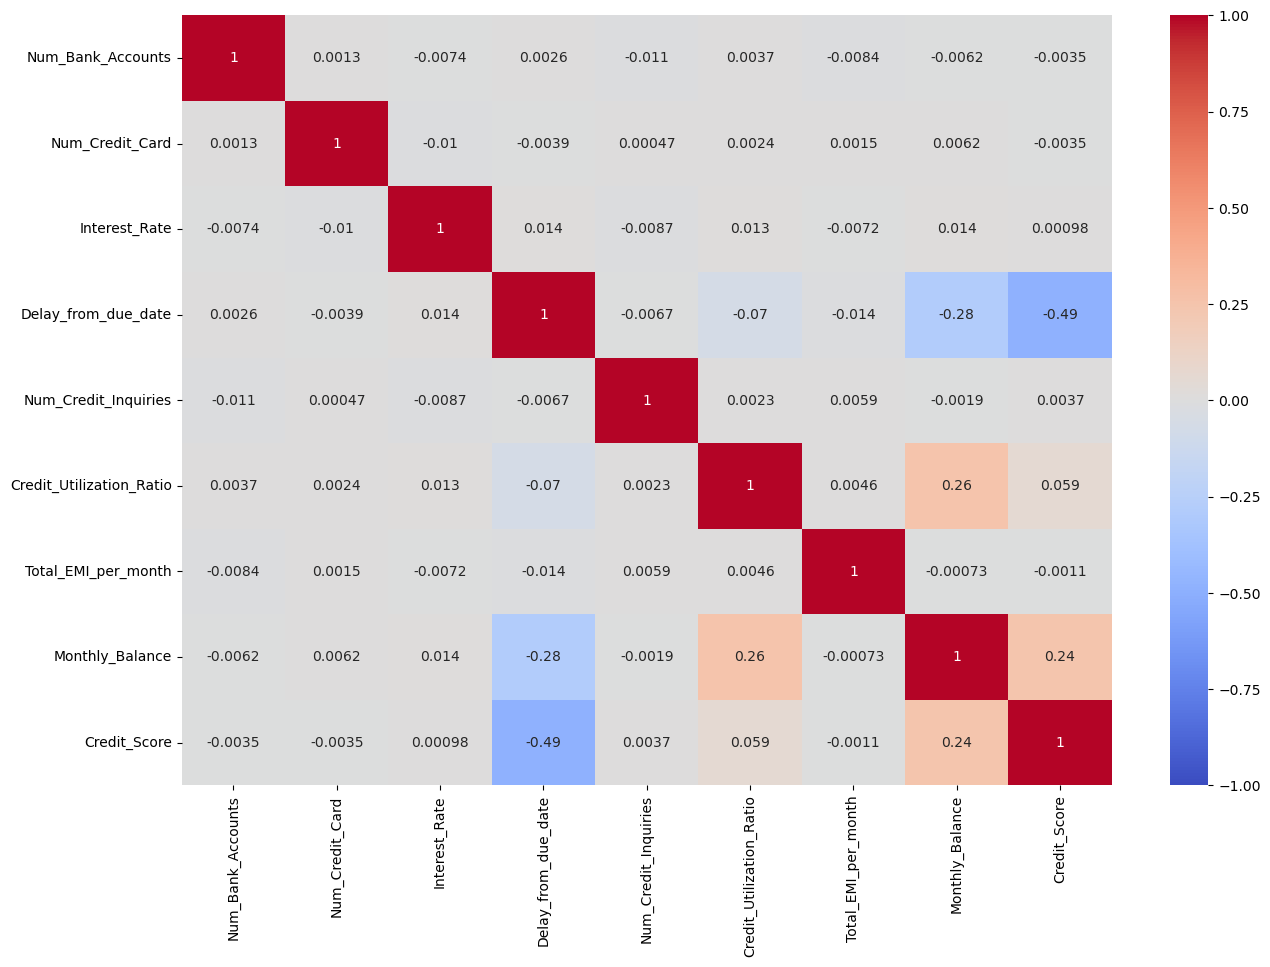

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(credit_df.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

In [12]:
## Data Cleaning - 숫자 데이터 처리

In [13]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [14]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,2
1,28_,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,1


In [15]:
list(credit_df.columns[credit_df.dtypes=='object'])

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour']

In [16]:
numeric_objs = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly']

In [17]:
# series 데이터를 만들어 추출 테스트
series = pd.Series(['5.5 g', '1.1', '1.5', '2', 'abc' ])
series.str.extract(r'([0-9]+.?[0-9]?)')

,0
0,5.5
1,1.1
2,1.5
3,2
4,NaN


In [18]:
series = pd.Series(['5.5 g', '1.1', '1.5', '2', 'abc', '1.', '23', '-1'])
series.str.extract(r'(-?\d+.\d+|-?\d+)')

,0
0,5.5
1,1.1
2,1.5
3,2
4,NaN
5,1
6,23
7,-1


In [19]:
for o_name in numeric_objs:
    credit_df[o_name] = pd.to_numeric(credit_df[o_name].str.extract(r'(-?\d+.\d+|-?\d+)', expand=False))
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  int64  
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  float64
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  float64
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [20]:
credit_df['Credit_History_Age']

0        22 Years and 1 Months
1        26 Years and 7 Months
2        17 Years and 9 Months
3        17 Years and 3 Months
4        30 Years and 8 Months
                 ...          
12495    28 Years and 1 Months
12496                      NaN
12497    29 Years and 9 Months
12498     5 Years and 8 Months
12499    31 Years and 3 Months
Name: Credit_History_Age, Length: 12500, dtype: object

In [21]:
import re
def get_month(s):
    if isinstance(s,str):
        year, month = re.findall('\d+', s)
        return int(year)*12+int(month)
    else:
        return np.NaN

credit_df['Credit_History_Age'] = credit_df['Credit_History_Age'].apply(get_month)

In [22]:
## Data Cleaning - 이상 데이터 처리

In [23]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.00000,12500.00000,12500.000000,11657.000000,12264.000000,12500.000000,12500.000000,11387.000000,12500.000000,11935.000000,12366.000000,12500.000000
mean,113.371280,1.888617e+05,17.275120,21.647680,69.46520,3.43656,21.051440,31.280089,24.591650,1426.220376,32.291949,217.588127,1303.781040,643.291976,405.815391,0.871440
std,691.223297,1.482707e+06,118.518214,123.789969,455.95698,65.35565,14.859994,229.911798,183.422458,1155.169458,5.084327,99.638681,8118.261086,2063.324328,218.136964,0.654268
min,-500.000000,7.005930e+03,0.000000,1.000000,1.00000,-100.00000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.948777e+04,3.000000,4.000000,8.00000,1.00000,10.000000,9.000000,2.000000,566.072500,28.110034,141.000000,29.128806,73.810753,271.785749,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.00000,3.00000,18.000000,14.000000,4.000000,1166.155000,32.297912,215.000000,66.372879,134.201478,337.169588,1.000000
75%,42.000000,7.289813e+04,7.000000,7.000000,20.00000,5.00000,28.000000,18.000000,8.000000,1945.962500,36.458660,298.000000,149.904496,264.555831,475.222487,1.000000
max,8592.000000,2.365819e+07,1779.000000,1479.000000,5788.00000,1496.00000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [24]:
credit_df[credit_df['Age']<0]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
70,-500,Scientist,144546.720,0,3,7,2,"Payday Loan, and Not Specified",15,7.0,1.0,1045.11,40.840687,275.0,No,136.988557,573.411590,High_spent_Small_value_payments,730.555853,1
81,-500,Teacher,103353.060,3,3,6,1,Student Loan,4,9.0,2.0,1374.56,32.685522,307.0,No,64.001686,NaN,High_spent_Medium_value_payments,857.826203,2
122,-500,Journalist,19163.220,3,7,7,2,"Personal Loan, and Payday Loan",23,18.0,5.0,2226.37,38.080964,194.0,Yes,24.175648,15.206734,High_spent_Medium_value_payments,345.311119,1
165,-500,Doctor,70112.780,1,7,3,2,"Mortgage Loan, and Student Loan",5,3.0,2.0,877.06,36.976516,298.0,No,69.717948,433.185268,Low_spent_Medium_value_payments,376.069951,0
207,-500,Teacher,94454.100,1,4,5,-100,"Credit-Builder Loan, Home Equity Loan, and Hom...",4,6.0,4.0,1342.61,26.063001,357.0,NM,152.506895,10000.000000,High_spent_Medium_value_payments,719.685063,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11722,-500,Developer,130682.940,2,331,1,4,"Payday Loan, Payday Loan, Mortgage Loan, and D...",14,11.0,3.0,752.98,27.912234,344.0,No,263.381445,463.128666,Low_spent_Large_value_payments,604.014389,2
11817,-500,Developer,35195.970,5,3,4,4,"Mortgage Loan, Auto Loan, Not Specified, and H...",3,7.0,4.0,843.36,24.565802,338.0,No,93.199692,191.504338,!@9#%8,279.095720,2
11839,-500,Architect,8845.965,7,10,26,5,"Credit-Builder Loan, Home Equity Loan, Mortgag...",40,23.0,6.0,1422.97,25.221897,NaN,Yes,33.948744,NaN,Low_spent_Medium_value_payments,278.220305,0
11917,-500,Teacher,29969.660,8,6,18,1,Auto Loan,24,18.0,5.0,157.07,32.408860,266.0,Yes,14.380462,39.495791,High_spent_Medium_value_payments,437.970914,1


In [25]:
credit_df = credit_df[credit_df['Age']>=0]

In [26]:
credit_df.sort_values(by='Age', ascending=False).head(100)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2963,8592,_______,81815.02,0,5,4,1,Mortgage Loan,4,NaN,3.0,1434.75,28.645438,394.0,No,53.927785,277.263979,Low_spent_Medium_value_payments,637.300069,2
9255,8587,Journalist,28286.24,4,7,7,1,Mortgage Loan,18,16.0,4.0,1406.94,33.599043,350.0,No,17.431672,41.114532,High_spent_Medium_value_payments,418.772462,1
12439,8490,Lawyer,150131.68,5,1,4,0,NaN,8,-2.0,0.0,1138.36,30.013470,376.0,No,0.000000,949.847265,Low_spent_Small_value_payments,599.850069,1
11218,8481,Journalist,15874.01,1,3,5,0,NaN,12,6.0,1.0,1173.38,24.443887,380.0,No,0.000000,53.610174,High_spent_Small_value_payments,311.373243,0
12472,8425,Writer,18512.97,7,5,18,3,"Student Loan, Student Loan, and Mortgage Loan",15,11.0,6.0,1366.56,29.253092,131.0,Yes,24.621173,63.282651,High_spent_Medium_value_payments,311.570927,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,5118,Developer,20043.26,7,10,25,6,"Not Specified, Home Equity Loan, Credit-Builde...",27,21.0,8.0,3713.24,29.715820,71.0,Yes,89.297385,74.523136,Low_spent_Large_value_payments,244.706646,1
6386,5111,Musician,18670.98,5,5,14,4,"Debt Consolidation Loan, Debt Consolidation Lo...",25,17.0,7.0,1397.21,29.853876,124.0,Yes,32.444454,94.771964,Low_spent_Small_value_payments,318.175081,1
8576,5020,Journalist,33376.81,2,5,1,3,"Student Loan, Credit-Builder Loan, and Debt Co...",11,9.0,3.0,252.34,39.320268,365.0,No,82.416442,10000.000000,Low_spent_Small_value_payments,245.850041,1
4073,4975,Lawyer,61314.12,0,3,8,3,"Not Specified, Payday Loan, and Not Specified",4,3.0,1.0,829.54,35.256472,235.0,No,92.421911,360.548063,Low_spent_Medium_value_payments,354.981026,1


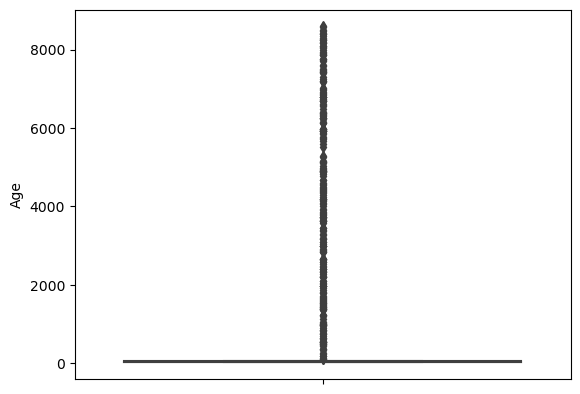

In [27]:
sns.boxplot(data=credit_df, y='Age')
plt.show()

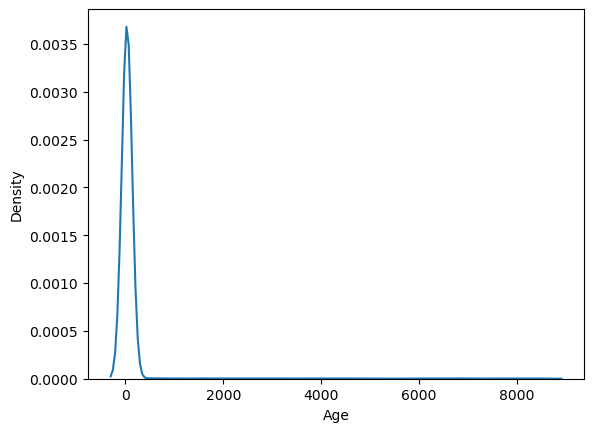

In [28]:
sns.kdeplot(data=credit_df, x='Age')
plt.show()

In [29]:
credit_df = credit_df[credit_df['Age']<150]

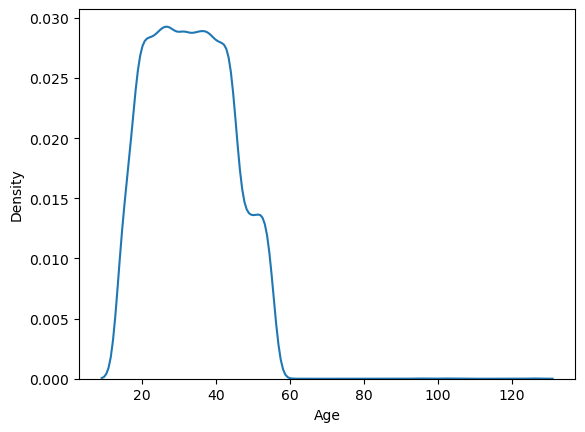

In [30]:
sns.kdeplot(data=credit_df, x='Age')
plt.show()

In [31]:
credit_df[credit_df['Num_Bank_Accounts']>15]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
233,52,Manager,33200.52,1429,4,20,2,"Student Loan, and Student Loan",25,18.0,4.0,1290.73,38.218731,209.0,No,28.064297,36.305270,High_spent_Medium_value_payments,461.201433,1
274,15,Accountant,33453.08,744,10,23,2,"Not Specified, and Debt Consolidation Loan",16,8.0,8.0,1498.09,23.296808,142.0,Yes,30.759834,202.759912,Low_spent_Medium_value_payments,312.355921,0
363,44,Developer,11968.51,1651,4,16,2,"Not Specified, and Auto Loan",22,18.0,0.0,685.74,27.670114,297.0,No,18.074485,36.679505,Low_spent_Large_value_payments,340.683593,1
383,31,Manager,37302.10,87,2,12,4,"Debt Consolidation Loan, Mortgage Loan, Not Sp...",13,12.0,1.0,907.73,34.471006,NaN,No,80.271752,186.121409,Low_spent_Small_value_payments,355.657672,2
403,22,Media_Manager,48780.56,450,5,16,0,NaN,29,20.0,1.0,967.75,25.668930,229.0,Yes,0.000000,91.953200,High_spent_Medium_value_payments,541.551466,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,18,Journalist,10203.99,1314,10,30,3,"Credit-Builder Loan, Home Equity Loan, and Stu...",15,6.0,7.0,1710.59,30.050663,61.0,Yes,16.576583,124.212441,Low_spent_Small_value_payments,261.144226,0
11560,15,Scientist,9700.81,889,7,21,3,"Mortgage Loan, Not Specified, and Credit-Build...",22,22.0,9.0,2542.15,31.902737,152.0,Yes,21.757520,43.669876,Low_spent_Large_value_payments,291.612687,0
11673,30,Lawyer,81463.60,690,5,1262,4,"Credit-Builder Loan, Debt Consolidation Loan, ...",23,11.0,8.0,2027.76,33.499294,107.0,Yes,178.693669,194.724241,!@9#%8,566.245423,0
11873,45,Architect,106614.18,1139,6,6,2,"Debt Consolidation Loan, and Mortgage Loan",7,0.0,4.0,40.71,35.076029,NaN,No,105.178651,450.602208,High_spent_Small_value_payments,619.270640,1


In [32]:
credit_df = credit_df[credit_df['Num_Bank_Accounts']<=15]

In [33]:
credit_df[credit_df['Num_Credit_Card']>20]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,31,Lawyer,73928.46,4,1288,8,0,NaN,12,10.0,2.0,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,2
35,36,Manager,71681.40,3,518,15,1,Not Specified,7,8.0,NaN,1293.02,40.339024,307.0,Yes,53.923514,301.292082,Low_spent_Small_value_payments,514.729404,1
54,36,Writer,17251.38,6,514,7,7,"Personal Loan, Student Loan, Home Equity Loan,...",8,13.0,6.0,2431.64,29.419722,136.0,Yes,57.351165,NaN,Low_spent_Small_value_payments,273.373540,1
65,17,Musician,75273.24,8,943,32,5,"Home Equity Loan, Credit-Builder Loan, Debt Co...",50,9.0,6.0,2497.34,33.594825,62.0,NM,222.619056,124.632288,High_spent_Large_value_payments,548.025656,1
74,35,Media_Manager,72330.98,0,262,11,1,Auto Loan,1,7.0,1.0,596.78,31.873842,392.0,No,31.379794,390.546200,Low_spent_Medium_value_payments,488.132172,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,35,Doctor,14329.24,9,170,21,9,"Personal Loan, Personal Loan, Debt Consolidati...",44,24.0,7.0,2182.60,37.545501,106.0,Yes,100.676194,60.550745,High_spent_Small_value_payments,216.083395,0
12414,22,Manager,81431.96,4,309,5,2,"Credit-Builder Loan, and Auto Loan",19,19.0,4.0,2352.06,26.788085,107.0,NM,104.249039,412.068500,Low_spent_Large_value_payments,432.782127,1
12440,42,Lawyer,40146.78,6,569,2372,5,"Mortgage Loan, Home Equity Loan, Student Loan,...",20,24.0,12.0,3539.88,26.838590,81.0,Yes,160.788151,186.368363,Low_spent_Small_value_payments,262.299986,0
12449,36,Writer,61167.90,3,1300,2,4,"Home Equity Loan, Mortgage Loan, Payday Loan, ...",10,5.0,3.0,1354.88,27.281315,184.0,No,176.742422,191.324202,High_spent_Small_value_payments,383.165876,2


In [34]:
credit_df = credit_df[credit_df['Num_Credit_Card']<=20]

In [35]:
credit_df[credit_df['Interest_Rate']>40]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
43,21,Lawyer,148699.320,3,4,748,3,"Personal Loan, Mortgage Loan, and Payday Loan",13,8.0,1.0,949.38,41.687213,367.0,No,364.915177,296.151828,High_spent_Large_value_payments,822.193995,2
59,45,Journalist,41746.760,8,5,5261,3,"Mortgage Loan, Personal Loan, and Not Specified",62,21.0,8.0,1936.79,37.705261,229.0,Yes,102.283398,425.103822,Low_spent_Small_value_payments,127.802447,0
106,21,Lawyer,66528.240,5,5,5189,0,NaN,17,9.0,2.0,1460.80,26.425181,268.0,Yes,0.000000,139.574561,High_spent_Large_value_payments,673.727439,1
136,43,Journalist,126006.680,4,3,2127,3,"Personal Loan, Home Equity Loan, and Debt Cons...",13,12.0,0.0,385.80,22.989722,311.0,Yes,239.767329,1069.389910,Low_spent_Medium_value_payments,40.198427,1
148,27,Media_Manager,91690.530,2,6,3325,2,"Home Equity Loan, and Not Specified",6,9.0,2.0,1295.18,27.353979,371.0,No,130.850858,254.869960,High_spent_Medium_value_payments,643.866932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,26,Engineer,26178.220,5,5,1079,7,"Auto Loan, Mortgage Loan, Personal Loan, Credi...",26,11.0,4.0,834.87,38.089213,218.0,Yes,95.037229,198.661839,Low_spent_Small_value_payments,217.452765,1
12251,29,Doctor,16045.125,1,6,1191,4,"Debt Consolidation Loan, Auto Loan, Home Equit...",11,2.0,1.0,1013.24,24.199026,245.0,No,30.293323,114.995311,Low_spent_Small_value_payments,280.820741,1
12287,38,Lawyer,41015.550,0,4,2510,1,Payday Loan,9,1.0,2.0,599.40,31.469081,299.0,No,25.671257,232.909909,Low_spent_Small_value_payments,346.715084,1
12324,32,Entrepreneur,87605.680,5,7,159,3,"Credit-Builder Loan, Personal Loan, and Person...",29,15.0,4.0,512.74,29.258146,353.0,Yes,112.148801,702.407730,Low_spent_Medium_value_payments,195.390802,1


In [36]:
credit_df = credit_df[credit_df['Interest_Rate']<=40]
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,11490.000000,1.149000e+04,11490.000000,11490.000000,11490.000000,11490.000000,11490.000000,10698.000000,11273.000000,11490.000000,11490.000000,10457.000000,11490.000000,10976.000000,11366.000000,11490.000000
mean,33.059095,1.866285e+05,5.379025,5.539339,14.581549,3.085117,21.069713,32.142643,25.608711,1427.902760,32.274254,217.221574,1309.551442,643.204912,405.465853,0.869017
std,10.841176,1.473141e+06,2.592267,2.073854,8.769076,63.604224,14.867902,235.544965,188.934193,1156.863843,5.081833,99.631989,8147.055367,2063.638237,217.861319,0.652924
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.940034e+04,3.000000,4.000000,7.000000,1.000000,10.000000,9.000000,2.000000,565.242500,28.109789,140.000000,29.571148,73.167755,271.699626,0.000000
50%,33.000000,3.746935e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.420000,32.257019,215.000000,66.140567,133.820509,336.830727,1.000000
75%,41.000000,7.287695e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1950.517500,36.402928,297.000000,149.464620,263.650717,474.568824,1.000000
max,126.000000,2.365819e+07,10.000000,17.000000,34.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [37]:
credit_df[credit_df['Num_of_Loan'] < 0]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,23,Doctor,1.148384e+05,2,5,7,-100,"Personal Loan, Debt Consolidation Loan, and Au...",13,11.0,3.0,1377.74,33.664554,256.0,No,226.892792,215.193516,High_spent_Small_value_payments,802.300442,2
23,31,Lawyer,1.260044e+04,5,5,10,-100,"Not Specified, Student Loan, and Student Loan",28,19.0,7.0,569.80,33.075884,147.0,Yes,26.060348,0.000000,High_spent_Large_value_payments,284.298204,1
49,38,Doctor,9.595650e+04,8,4,11,-100,"Personal Loan, and Student Loan",18,10.0,2.0,1079.73,33.776928,379.0,No,95.521629,NaN,High_spent_Large_value_payments,884.905690,1
89,53,Engineer,1.799278e+04,3,5,6,-100,NaN,5,9.0,2.0,565.22,22.380399,227.0,No,0.000000,88.442753,!@9#%8,348.497038,0
152,32,Accountant,4.222039e+04,1,4,1,-100,"Credit-Builder Loan, Student Loan, Mortgage Lo...",9,9.0,1.0,257.81,25.564597,268.0,NM,135.270396,93.311060,High_spent_Small_value_payments,380.455127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12373,40,Accountant,7.293668e+04,0,2,12,-100,Student Loan,5,9.0,0.0,827.89,27.620636,376.0,No,51.672175,223.194349,High_spent_Medium_value_payments,555.139143,2
12408,23,Accountant,1.799762e+07,0,3,2,-100,"Home Equity Loan, and Debt Consolidation Loan",11,-2.0,2.0,929.91,39.586795,339.0,No,66.417096,299.289270,Low_spent_Large_value_payments,517.670134,2
12421,31,Media_Manager,6.146578e+04,2,3,11,-100,Debt Consolidation Loan,-4,10.0,0.0,608.87,26.846460,214.0,No,31.650737,10000.000000,Low_spent_Medium_value_payments,612.047512,1
12443,28,Writer,2.909050e+04,5,7,20,-100,"Not Specified, Mortgage Loan, Personal Loan, a...",11,19.0,6.0,1612.70,29.028532,NaN,Yes,67.439731,18.955144,!@9#%8,400.825959,0


In [38]:
credit_df = credit_df[credit_df['Num_of_Loan']>=0]

In [39]:
credit_df[credit_df['Num_of_Loan']>10]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
251,21,Accountant,31069.32,2,3,12,352,"Auto Loan, and Student Loan",14,3.0,2.0,343.60,36.403191,227.0,No,34.168604,139.087147,Low_spent_Medium_value_payments,342.855248,2
412,31,Media_Manager,24726.48,4,6,15,49,"Personal Loan, and Student Loan",13,18.0,2.0,155.22,32.334139,331.0,No,25.144006,144.981614,Low_spent_Small_value_payments,296.628380,1
701,28,Lawyer,72140.07,6,5,9,92,Personal Loan,23,11.0,4.0,638.12,28.146791,335.0,Yes,52.448822,86.058787,High_spent_Medium_value_payments,689.259641,1
788,25,Lawyer,20821.80,5,6,9,931,"Payday Loan, and Credit-Builder Loan",30,9.0,4.0,1485.97,36.990987,321.0,NM,21.189697,10000.000000,Low_spent_Small_value_payments,242.575775,0
920,41,Entrepreneur,87481.62,0,4,3,1001,Credit-Builder Loan,15,6.0,3.0,214.43,40.836559,281.0,No,55.653369,280.253603,Low_spent_Large_value_payments,636.306527,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11442,14,Manager,23646.08,4,3,14,1279,"Debt Consolidation Loan, Mortgage Loan, Person...",11,14.0,4.0,1388.59,31.027954,157.0,Yes,108.835292,199.642644,Low_spent_Small_value_payments,156.772730,1
11778,42,Developer,145800.84,7,6,10,136,"Home Equity Loan, Mortgage Loan, Payday Loan, ...",26,12.0,7.0,1292.50,34.747823,136.0,Yes,450.318986,180.736289,High_spent_Large_value_payments,853.851725,1
12094,29,Developer,19170.73,3,5,8,628,"Auto Loan, Debt Consolidation Loan, Personal L...",0,0.0,4.0,318.94,39.557287,237.0,No,58.048072,24.534698,High_spent_Large_value_payments,288.973313,2
12364,38,Entrepreneur,72305.90,5,7,15,1132,"Credit-Builder Loan, Mortgage Loan, Home Equit...",13,22.0,3.0,1169.62,26.026758,333.0,Yes,216.776298,161.813413,High_spent_Medium_value_payments,448.059456,1


In [40]:
credit_df = credit_df[credit_df['Num_of_Loan'] <= 10]
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,10962.000000,1.096200e+04,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10211.000000,10756.000000,10962.000000,10962.000000,9967.000000,10962.000000,10467.000000,10840.000000,10962.000000
mean,33.051450,1.883649e+05,5.386882,5.538223,14.592957,3.551086,21.077997,32.153364,25.391967,1430.720572,32.280297,216.917729,1322.946726,646.267079,405.457876,0.867907
std,10.849784,1.479180e+06,2.592619,2.073428,8.770902,2.445350,14.866269,235.514629,187.830044,1157.946241,5.083792,99.464423,8210.230324,2068.487919,218.035874,0.651802
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.940034e+04,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,2.000000,566.112500,28.134649,140.000000,29.611320,73.245889,271.841052,0.000000
50%,33.000000,3.767917e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.300000,32.241126,214.000000,66.330859,133.568502,336.830727,1.000000
75%,41.000000,7.304901e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1961.112500,36.409833,296.000000,150.112234,265.698536,474.174874,1.000000
max,126.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [41]:
credit_df[credit_df['Num_of_Delayed_Payment']>30]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
38,36,Musician,15566.02,8,5,32,4,"Home Equity Loan, Credit-Builder Loan, Persona...",16,1338.0,7.0,1693.95,37.409934,94.0,Yes,43.070520,65.986586,Low_spent_Small_value_payments,323.259728,0
129,47,Accountant,37071.20,1,6,6,4,"Home Equity Loan, Debt Consolidation Loan, Per...",17,2672.0,3.0,869.99,34.988336,220.0,No,74.690271,386.899561,Low_spent_Small_value_payments,129.036834,2
202,23,Mechanic,51824.94,6,7,26,8,"Debt Consolidation Loan, Debt Consolidation Lo...",40,2420.0,8.0,2958.02,32.823217,87.0,Yes,257.659454,183.182469,Low_spent_Small_value_payments,290.932576,0
222,32,Architect,26716.09,4,5,6,3,"Not Specified, Credit-Builder Loan, and Person...",33,708.0,0.0,643.89,31.043805,NaN,NM,55.139933,305.948918,Low_spent_Small_value_payments,166.145232,1
287,42,Writer,30232.28,5,3,4,4,"Mortgage Loan, Mortgage Loan, Mortgage Loan, a...",0,1867.0,2.0,1483.59,25.744216,377.0,NM,98.469454,NaN,High_spent_Medium_value_payments,308.192603,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,41,Developer,82154.92,6,5,34,6,"Debt Consolidation Loan, Credit-Builder Loan, ...",20,676.0,6.0,4726.13,38.904204,26.0,Yes,238.372704,241.760627,High_spent_Medium_value_payments,445.191003,1
11972,23,Mechanic,42527.04,8,6,22,7,"Auto Loan, Home Equity Loan, Not Specified, No...",22,1180.0,10.0,4193.78,22.893718,125.0,Yes,230.268934,191.191603,Low_spent_Large_value_payments,186.031463,0
12027,33,Media_Manager,55163.82,9,9,28,6,"Payday Loan, Auto Loan, Student Loan, Debt Con...",40,1967.0,9.0,4085.14,35.544376,101.0,Yes,187.505105,211.814816,Low_spent_Medium_value_payments,367.678578,1
12186,31,Media_Manager,16241.52,9,9,23,6,"Personal Loan, Debt Consolidation Loan, Person...",16,1775.0,8.0,2410.41,28.758281,73.0,Yes,71.890921,74.726412,Low_spent_Small_value_payments,298.228667,0


In [42]:
credit_df = credit_df[credit_df['Num_of_Delayed_Payment']<=30]

In [43]:
credit_df[credit_df['Num_Credit_Inquiries']>30]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
39,18,Developer,66567.32,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,1618.0,233.79,34.456272,291.0,No,37602.000000,251.647422,Low_spent_Small_value_payments,518.190884,1
338,39,Media_Manager,38685.98,1,5,3,2,"Mortgage Loan, and Mortgage Loan",10,12.0,829.0,1340.41,36.503125,353.0,No,52.602515,148.427351,Low_spent_Small_value_payments,425.053300,2
343,19,Scientist,54987.52,4,5,10,0,NaN,18,14.0,821.0,1263.12,40.185051,194.0,Yes,0.000000,208.186756,High_spent_Small_value_payments,528.042578,1
610,54,Doctor,130688.56,0,2,2,0,NaN,12,6.0,2592.0,466.13,27.269504,188.0,NM,0.000000,663.033973,Low_spent_Medium_value_payments,730.437360,2
614,52,Writer,20871.42,2,2,2,3,"Mortgage Loan, Home Equity Loan, and Payday Loan",13,0.0,1529.0,1177.09,35.206633,203.0,No,51.128519,94.692734,Low_spent_Medium_value_payments,286.407246,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,40,Accountant,40878.85,0,5,11,4,"Student Loan, Student Loan, Mortgage Loan, and...",4,8.0,1377.0,1360.31,34.023653,287.0,No,105.017091,NaN,High_spent_Medium_value_payments,446.436738,2
12337,27,Entrepreneur,14458.00,3,8,29,6,"Auto Loan, Mortgage Loan, Not Specified, Mortg...",19,7.0,289.0,1701.54,38.001467,89.0,Yes,47.876044,81.218592,Low_spent_Small_value_payments,286.088698,0
12394,29,Scientist,41398.44,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",25,9.0,1801.0,1701.88,29.506673,218.0,Yes,182.976650,195.529273,Low_spent_Large_value_payments,266.481077,1
12475,16,Developer,14937.49,8,8,22,7,"Student Loan, Mortgage Loan, Debt Consolidatio...",44,12.0,2209.0,3699.44,23.574545,158.0,Yes,50.960878,97.586933,Low_spent_Small_value_payments,255.731272,1


In [44]:
credit_df = credit_df[credit_df['Num_Credit_Inquiries']<=30]

In [45]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,9783.000000,9.783000e+03,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,8902.00000,9783.000000,9341.000000,9681.000000,9783.000000
mean,33.012777,1.968633e+05,5.376572,5.535725,14.604722,3.546560,21.134417,13.331289,4.968108,1428.523050,32.288218,216.58279,1331.043366,640.834829,405.839881,0.866196
std,10.871808,1.527828e+06,2.588185,2.071293,8.782432,2.445575,14.905071,6.318097,3.548277,1157.958232,5.091529,99.43767,8260.515011,2057.303639,217.812565,0.653056
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.00000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.943454e+04,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,2.000000,563.500000,28.153459,140.00000,29.607207,73.008389,272.274231,0.000000
50%,33.000000,3.798312e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1163.470000,32.231862,214.00000,66.244882,133.213754,337.393136,1.000000
75%,41.000000,7.311319e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1962.220000,36.424183,296.00000,149.681800,265.907953,475.056392,1.000000
max,126.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,28.000000,12.000000,4998.070000,49.564519,397.00000,82122.000000,10000.000000,1602.040519,2.000000


In [46]:
credit_df = credit_df[credit_df['Delay_from_due_date']>=0]
credit_df = credit_df[credit_df['Num_of_Delayed_Payment']>=0]

In [47]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,9662.000000,9.662000e+03,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,8795.000000,9662.000000,9226.000000,9560.000000,9662.000000
mean,32.979714,1.983795e+05,5.414096,5.552474,14.706065,3.569033,21.344960,13.475057,5.006520,1437.309764,32.284144,215.792382,1328.535867,642.450542,403.895741,0.857690
std,10.869934,1.537294e+06,2.574794,2.067510,8.780331,2.448126,14.857816,6.202359,3.550785,1161.389416,5.089341,99.517633,8253.883592,2062.604271,215.807018,0.648849
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.340000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.940653e+04,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,2.000000,568.780000,28.141629,139.000000,29.808613,72.580320,271.655800,0.000000
50%,33.000000,3.782065e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1171.225000,32.233511,213.000000,66.368206,132.789653,336.665065,1.000000
75%,41.000000,7.260736e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1977.732500,36.428199,296.000000,149.613125,265.078449,471.894918,1.000000
max,126.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,28.000000,12.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


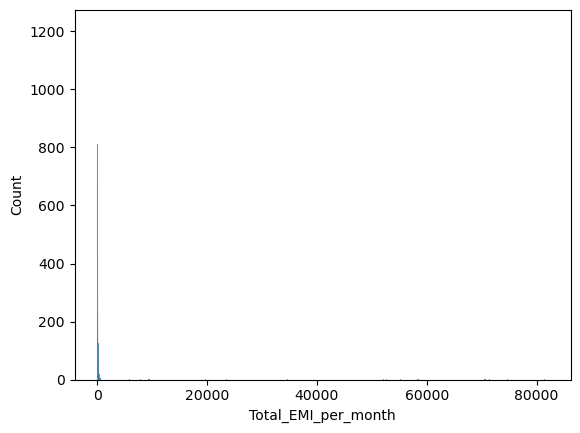

In [48]:
sns.histplot(data=credit_df,x='Total_EMI_per_month')
plt.show()

In [49]:
## 결측치 처리

In [50]:
credit_df.isnull().mean()

Age                         0.000000
Occupation                  0.000000
Annual_Income               0.000000
Num_Bank_Accounts           0.000000
Num_Credit_Card             0.000000
Interest_Rate               0.000000
Num_of_Loan                 0.000000
Type_of_Loan                0.111468
Delay_from_due_date         0.000000
Num_of_Delayed_Payment      0.000000
Num_Credit_Inquiries        0.000000
Outstanding_Debt            0.000000
Credit_Utilization_Ratio    0.000000
Credit_History_Age          0.089733
Payment_of_Min_Amount       0.000000
Total_EMI_per_month         0.000000
Amount_invested_monthly     0.045125
Payment_Behaviour           0.000000
Monthly_Balance             0.010557
Credit_Score                0.000000
dtype: float64

In [51]:
credit_df.loc[credit_df['Type_of_Loan'].isnull(), ['Num_of_Loan', 'Type_of_Loan']]

,Num_of_Loan,Type_of_Loan
16,0,NaN
18,0,NaN
20,0,NaN
22,0,NaN
40,0,NaN
...,...,...
12476,0,NaN
12482,0,NaN
12485,0,NaN
12488,0,NaN


In [52]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].fillna('No_Loan')

In [53]:
credit_df.isnull().mean()

Age                         0.000000
Occupation                  0.000000
Annual_Income               0.000000
Num_Bank_Accounts           0.000000
Num_Credit_Card             0.000000
Interest_Rate               0.000000
Num_of_Loan                 0.000000
Type_of_Loan                0.000000
Delay_from_due_date         0.000000
Num_of_Delayed_Payment      0.000000
Num_Credit_Inquiries        0.000000
Outstanding_Debt            0.000000
Credit_Utilization_Ratio    0.000000
Credit_History_Age          0.089733
Payment_of_Min_Amount       0.000000
Total_EMI_per_month         0.000000
Amount_invested_monthly     0.045125
Payment_Behaviour           0.000000
Monthly_Balance             0.010557
Credit_Score                0.000000
dtype: float64

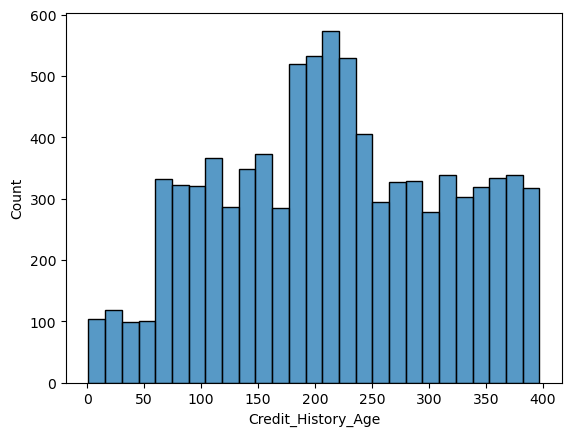

In [54]:
sns.histplot(data=credit_df, x='Credit_History_Age')
plt.show()

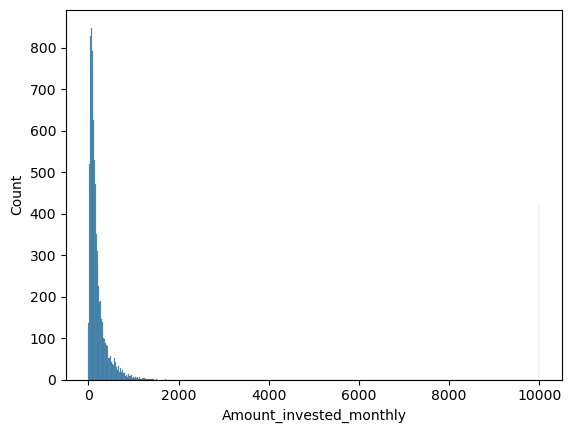

In [55]:
sns.histplot(data=credit_df, x='Amount_invested_monthly')
plt.show()

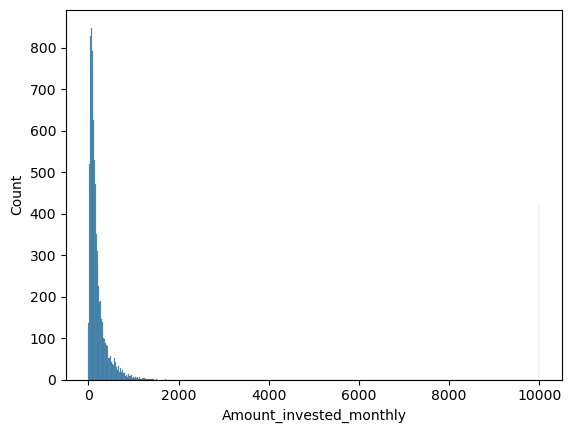

In [56]:
sns.histplot(data=credit_df, x='Amount_invested_monthly')
plt.show()

In [57]:
credit_df = credit_df.fillna(credit_df.median())

C:\Users\dukim\AppData\Local\Temp\ipykernel_27388\1928047286.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_df = credit_df.fillna(credit_df.median())


In [58]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 0 to 12498
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9662 non-null   int64  
 1   Occupation                9662 non-null   object 
 2   Annual_Income             9662 non-null   float64
 3   Num_Bank_Accounts         9662 non-null   int64  
 4   Num_Credit_Card           9662 non-null   int64  
 5   Interest_Rate             9662 non-null   int64  
 6   Num_of_Loan               9662 non-null   int64  
 7   Type_of_Loan              9662 non-null   object 
 8   Delay_from_due_date       9662 non-null   int64  
 9   Num_of_Delayed_Payment    9662 non-null   float64
 10  Num_Credit_Inquiries      9662 non-null   float64
 11  Outstanding_Debt          9662 non-null   float64
 12  Credit_Utilization_Ratio  9662 non-null   float64
 13  Credit_History_Age        9662 non-null   float64
 14  Payment

## 텍스트 데이터 변환

In [59]:
credit_df['Type_of_Loan'].head()

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1                                  Credit-Builder Loan
2              Auto Loan, Auto Loan, and Not Specified
3                                        Not Specified
6               Credit-Builder Loan, and Mortgage Loan
Name: Type_of_Loan, dtype: object

In [60]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].str.replace('and ', '').str.split(', ')

In [61]:
type_list = set(credit_df['Type_of_Loan'].sum())
type_list

{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No_Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

In [62]:
for t in type_list:
    credit_df[t] = credit_df['Type_of_Loan'].apply(lambda types: 1 if t in types else 0)

In [63]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit-Builder Loan,Student Loan,Debt Consolidation Loan,Auto Loan,Not Specified,Mortgage Loan,Payday Loan,No_Loan,Personal Loan,Home Equity Loan
0,23,Scientist,19114.12,3,4,3,4,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,7.0,...,1,0,0,1,0,0,0,0,1,1
1,28,_______,34847.84,2,4,6,1,[Credit-Builder Loan],3,4.0,...,1,0,0,0,0,0,0,0,0,0
2,34,_______,143162.64,1,5,8,3,"[Auto Loan, Auto Loan, Not Specified]",5,8.0,...,0,0,0,1,1,0,0,0,0,0
3,54,Entrepreneur,30689.89,2,5,4,1,[Not Specified],0,6.0,...,0,0,0,0,1,0,0,0,0,0
6,33,Lawyer,131313.40,0,1,8,2,"[Credit-Builder Loan, Mortgage Loan]",0,3.0,...,1,0,0,0,0,1,0,0,0,0


In [64]:
credit_df = credit_df.drop('Type_of_Loan', axis=1)

In [65]:
credit_df.columns[credit_df.dtypes=='object']

Index(['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour'], dtype='object')

In [66]:
credit_df['Occupation'].value_counts()

_______          655
Lawyer           646
Mechanic         627
Engineer         617
Scientist        609
Architect        607
Teacher          604
Developer        604
Entrepreneur     596
Musician         594
Journalist       593
Accountant       592
Media_Manager    589
Doctor           588
Manager          578
Writer           563
Name: Occupation, dtype: int64

In [67]:
credit_df['Occupation'] = credit_df['Occupation'].replace('_______', 'Unknown')
credit_df['Occupation'].value_counts()

Unknown          655
Lawyer           646
Mechanic         627
Engineer         617
Scientist        609
Architect        607
Teacher          604
Developer        604
Entrepreneur     596
Musician         594
Journalist       593
Accountant       592
Media_Manager    589
Doctor           588
Manager          578
Writer           563
Name: Occupation, dtype: int64

In [68]:
credit_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2406
High_spent_Medium_value_payments    1744
High_spent_Large_value_payments     1407
Low_spent_Medium_value_payments     1334
High_spent_Small_value_payments     1098
Low_spent_Large_value_payments       955
!@9#%8                               718
Name: Payment_Behaviour, dtype: int64

In [69]:
credit_df['Payment_Behaviour'] = credit_df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')
credit_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2406
High_spent_Medium_value_payments    1744
High_spent_Large_value_payments     1407
Low_spent_Medium_value_payments     1334
High_spent_Small_value_payments     1098
Low_spent_Large_value_payments       955
Unknown                              718
Name: Payment_Behaviour, dtype: int64

In [70]:
credit_df['Payment_of_Min_Amount'].value_counts()

Yes    5145
No     3362
NM     1155
Name: Payment_of_Min_Amount, dtype: int64

In [71]:
## 더미 변수 만들기

In [72]:
credit_df = pd.get_dummies(data=credit_df, columns=credit_df.columns[credit_df.dtypes=='object'])

In [73]:
credit_df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,23,19114.12,3,4,3,4,3,7.0,4.0,809.98,...,0,1,0,0,0,1,0,0,0,0
1,28,34847.84,2,4,6,1,3,4.0,2.0,605.03,...,0,1,0,0,0,0,0,0,1,0
2,34,143162.64,1,5,8,3,5,8.0,3.0,1303.01,...,0,1,0,0,0,0,0,0,0,1
3,54,30689.89,2,5,4,1,0,6.0,4.0,632.46,...,0,1,0,0,0,0,1,0,0,0
6,33,131313.40,0,1,8,2,0,3.0,2.0,352.16,...,1,0,0,0,1,0,0,0,0,0


## LightGBM 알고리즘으로 모델링하기

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(credit_df.drop('Credit_Score', axis=1), credit_df['Credit_Score'], test_size=0.25, random_state=100)

In [76]:
from lightgbm import LGBMClassifier

In [77]:
base_model = LGBMClassifier(random_state=100)

In [78]:
base_model.fit(X_train, y_train)

LGBMClassifier(random_state=100)

In [79]:
pred1 = base_model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [81]:
accuracy_score(y_test, pred1)

0.7346854304635762

In [82]:
confusion_matrix(y_test, pred1)

array([[ 501,  165,   17],
       [ 191, 1059,  115],
       [  13,  140,  215]], dtype=int64)

In [83]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       683
           1       0.78      0.78      0.78      1365
           2       0.62      0.58      0.60       368

    accuracy                           0.73      2416
   macro avg       0.70      0.70      0.70      2416
weighted avg       0.73      0.73      0.73      2416



In [84]:
proba1 = base_model.predict_proba(X_test)
proba1

array([[2.40769576e-01, 6.44691783e-01, 1.14538641e-01],
       [7.84242580e-01, 2.15227385e-01, 5.30034957e-04],
       [7.87588510e-01, 2.12262128e-01, 1.49362157e-04],
       ...,
       [2.01936186e-03, 9.97614091e-01, 3.66547476e-04],
       [4.12273351e-03, 2.39057983e-01, 7.56819283e-01],
       [5.48191403e-01, 4.51589801e-01, 2.18796066e-04]])

In [85]:
roc_auc_score(y_test, proba1, multi_class='ovr')

0.9048938124538921

## 그리드 서치

In [86]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [87]:
params = {'n_estimators': [100, 300, 500, 1000], 'max_depth': [-1, 10, 30, 50]}

In [88]:
lgbm = LGBMClassifier(random_state=100)

In [89]:
grid_lgbm = GridSearchCV(lgbm, params, cv=3)

In [90]:
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=100),
             param_grid={'max_depth': [-1, 10, 30, 50],
                         'n_estimators': [100, 300, 500, 1000]})

In [91]:
grid_lgbm.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [92]:
proba2 = grid_lgbm.predict_proba(X_test)

In [93]:
roc_auc_score(y_test, proba2, multi_class='ovr')

0.9042354921826469

In [94]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [-1, 30, 50, 100],
    'num_leaves': [5, 10 ,20 ,50],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [95]:
rand_lgbm = RandomizedSearchCV(lgbm, params, cv=3, n_iter=30, random_state=100)

In [96]:
rand_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=100), n_iter=30,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [-1, 30, 50, 100],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100)

In [97]:
rand_lgbm.best_params_

{'num_leaves': 5, 'n_estimators': 100, 'max_depth': -1, 'learning_rate': 0.1}

In [98]:
proba3 = rand_lgbm.predict_proba(X_test)

In [99]:
roc_auc_score(y_test, proba3, multi_class='ovr')

0.9073668671353255

## LightGBM 알고리즘의 이해
* Tree-based Models
    * ![tree](images/tree_based.PNG)
* 배깅 vs 부스트
    * ![비교](images/random_vs_lgbm.PNG)
* XGBoost vs LightGBM
    * ![비교](images/xgboost_vs_lightGBM.PNG)